<a href="https://colab.research.google.com/github/Jakkaton/Project/blob/main/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Dog vision (Unstructure data)

###1. Problem
*             Identifying the breed of a dog given an image of a dog.

###2. Data
*              from kaggle https://www.kaggle.com/competitions/dog-breed-identification/overview

###3.Evaluation
*              The prediction probablity for each image in the test set and for each of the different breeds.

###4. Feature
*              Data information :
                  - There are 120 different breeds of dogs.
                  - Dealing with image dataset. (Unstructure data)
                  - There are above 10,000 images for training data. (include labels)
                  - There are above 10,000 images for testing data. (Predict the images, no labels)

In [ ]:
# Unzip the uploaded data into Google drive
#!unzip "/content/drive/MyDrive/Dog vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog vision"

# Get our workspace ready

In [ ]:
#import neccessary tools
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
labels_csv = pd.read_csv("drive/MyDrive/Dog vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


We now have 10222 different IDs and 10222 different breeds.

<Axes: >

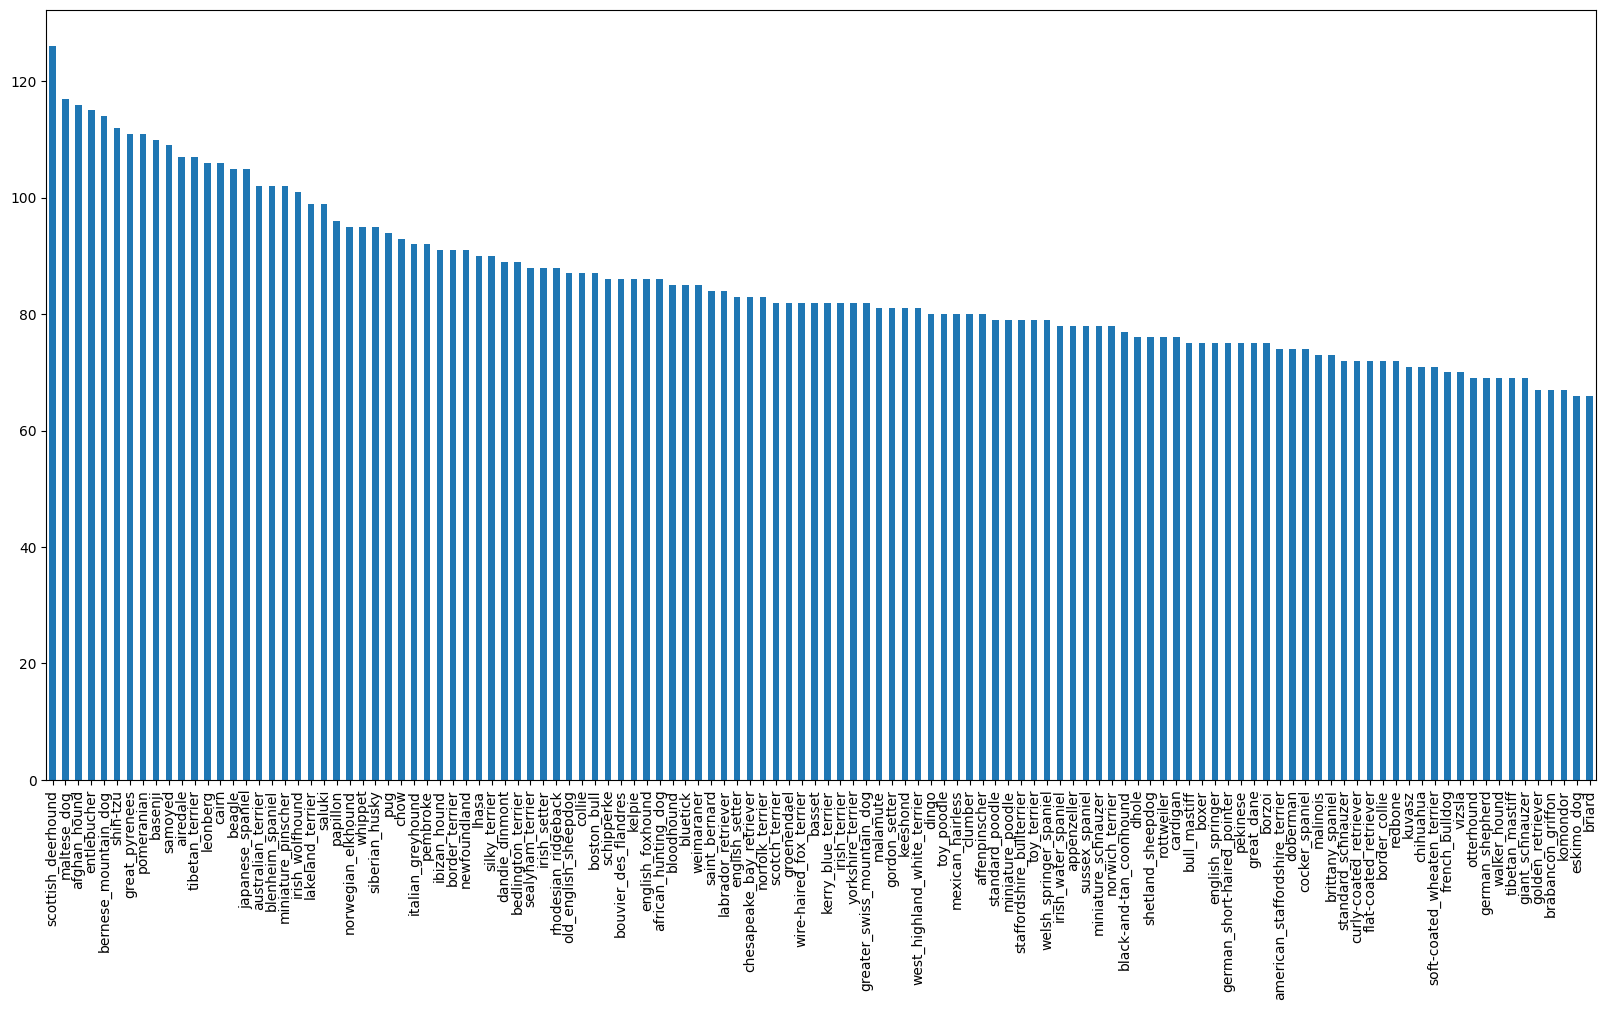

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize= (20,10))

### Create a filepath for image files

Because filepaths strings is much efficient than working with images.

In [ ]:
# create pathname from image ID's
filenames = ["/content/drive/MyDrive/Dog vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# check the filenames
filenames[:5]

['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


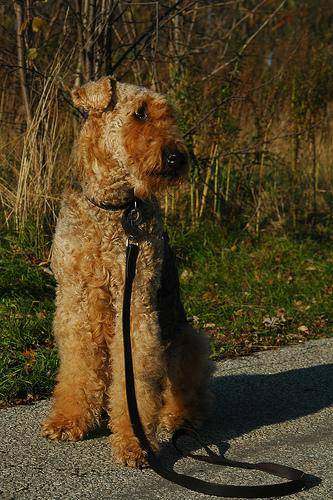

In [ ]:
#check the image
from IPython.display import Image, display
Image(filenames[5000])

In [ ]:
# Turn them into Numpy array
labels = labels_csv["breed"].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
# Compare the number of labels to the number of filenames.
if len(labels) == len(filenames):
  print("The numbers match!")
else:
  print("The numbers don't match.")

The numbers match!


since machine learning model can't take string as input, we will convert them to number

In [ ]:
unique_breed = np.unique(labels)
len(unique_breed)

120

In [ ]:
# Test it
print(unique_breed[5])

appenzeller


In [ ]:
labels[5] == unique_breed

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
bool_labels = [label == np.array(unique_breed) for label in labels]
bool_labels[5]

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#setup X and y
X = filenames
y = bool_labels

In [ ]:
# set number of image for experimenting
NUM_IMG = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMG

1000

In [ ]:
# import train test split from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMG],
                                                                    y[:NUM_IMG],
                                                                    test_size = 0.2,
                                                                    random_state = 42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

### Preprocessing images (turning images into Tensors)

     To preprocess our images into Tensors we're going to write a function which does a few things:
              1.Takes an image filename as input.
              2.Uses TensorFlow to read the file and save it to a variable, image.
              3.Turn our image (a jpeg file) into Tensors.
              4.Resize the image to be of shape (224, 224).
              5.Return the modified image.

In [ ]:
from matplotlib.pyplot import imread
image = imread(filenames[59])
image.shape

(500, 375, 3)

In [ ]:
tf.constant(image)[:5]

<tf.Tensor: shape=(5, 375, 3), dtype=uint8, numpy=
array([[[ 0,  2,  0],
        [ 0,  1,  0],
        [ 2,  4,  0],
        ...,
        [ 9, 19,  0],
        [13, 23,  0],
        [50, 60, 35]],

       [[ 7,  9,  4],
        [ 5,  7,  2],
        [ 9, 11,  6],
        ...,
        [10, 20,  0],
        [26, 36, 12],
        [49, 59, 35]],

       [[ 6,  8,  3],
        [ 8, 10,  5],
        [12, 14,  9],
        ...,
        [21, 28, 10],
        [46, 53, 35],
        [38, 45, 27]],

       [[ 0,  1,  0],
        [ 3,  5,  0],
        [ 9, 11,  6],
        ...,
        [35, 39, 25],
        [60, 64, 50],
        [22, 26, 12]],

       [[ 0,  2,  0],
        [ 4,  6,  3],
        [ 8, 10,  7],
        ...,
        [33, 33, 23],
        [56, 56, 46],
        [14, 14,  6]]], dtype=uint8)>

In [ ]:
#Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
    Take an image file path and turn it into a tensor
  """
  # read image file
  image = tf.io.read_file(image_path)
  #turn an image into numerical tensor
  image = tf.io.decode_jpeg(image, channels=3)
  # convert the colour chanel values from 0-225 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize an image to (224,224)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE] )
  return image

In [ ]:
#create a function to return a tuple(image, labels)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
#Define batch size = 32
BATCH_SIZE = 32

#create a fuction turn images into batches
def create_data_batched(x, y=None, batch_size = BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #filepath no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches... ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                                 tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                                 tf.constant(y)))

    data = data.shuffle(buffer_size=len(x))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
#create a training and validation data batches
train_data = create_data_batched(X_train, y_train)
val_data = create_data_batched(X_val, y_val, valid_data =True)

Creating training data batches....
Creating validation data batches... 


In [ ]:
#check out our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
#Create a function for viewing images in a data batch

def show_image(images, labels):
  """
  showing 25 images from a data batch
  """
  plt.figure(figsize=(12,10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breed[labels[i].argmax()])
    plt.axis("off")

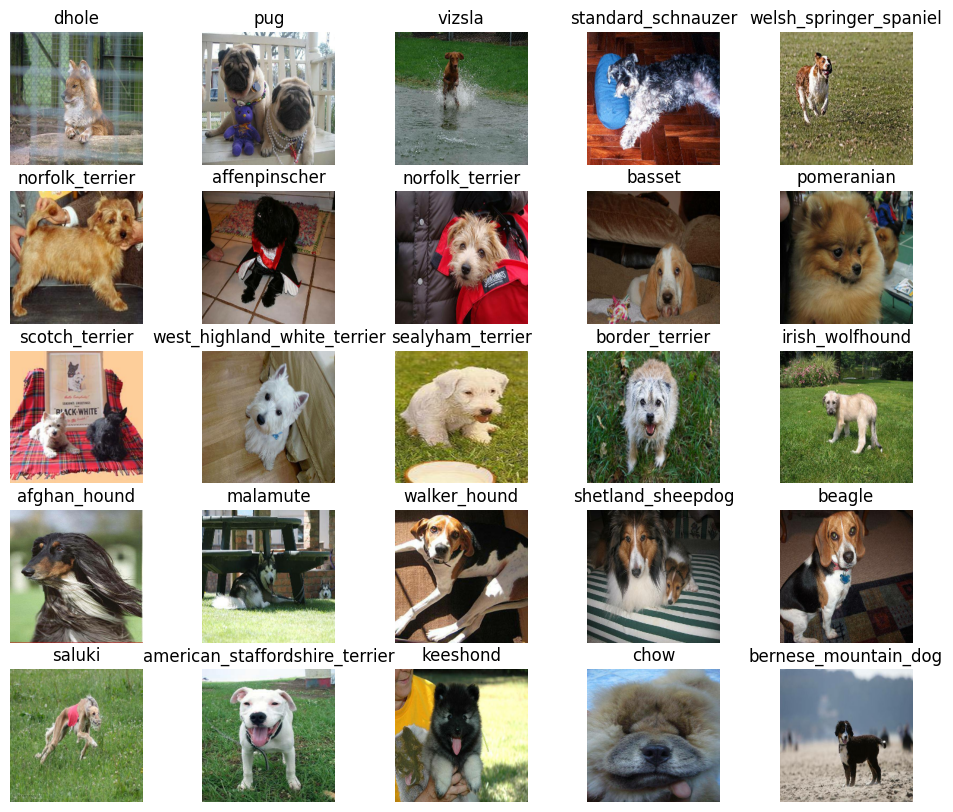

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_image(train_images, train_labels)

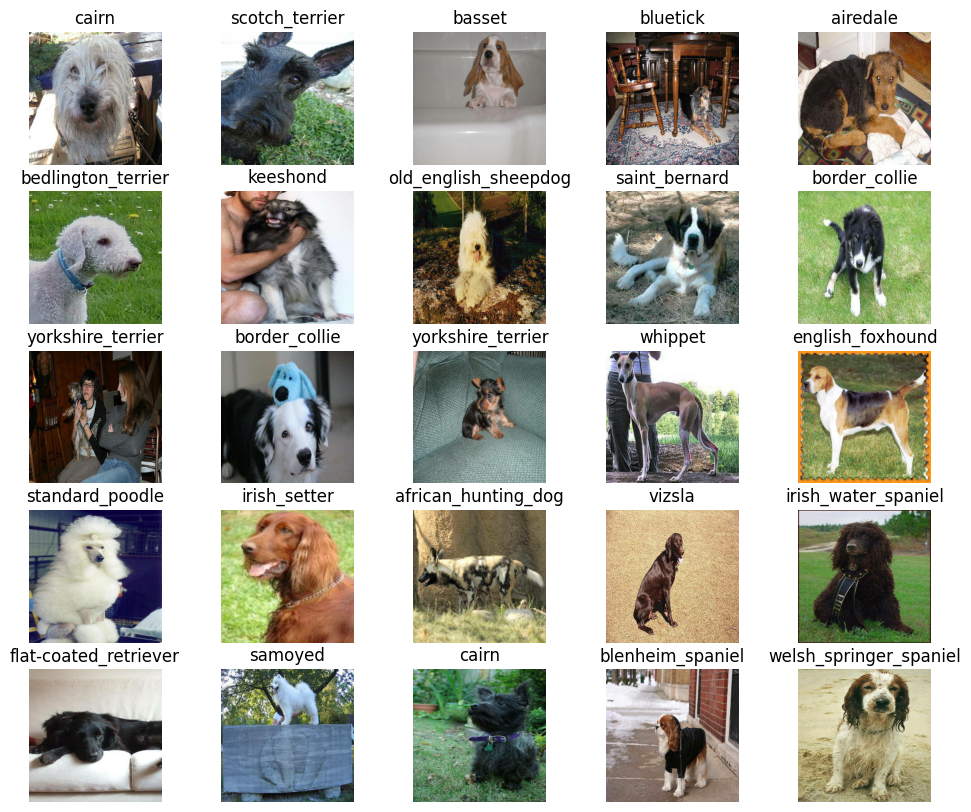

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_image(val_images, val_labels)

# Building a model

In [ ]:
#define input shape (image shape)
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #[batch, img size(h), img size(w), colour channel]

#define output shape (image labels)
OUTPUT_SHAPE = len(unique_breed)

#setup URL of the model
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5"

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape= OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  #setup the model layer
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),
                                          tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation = "softmax")
                                          ])

#complie the model
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["Accuracy"])
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 6,278,745
Trainable params: 120,240
Non-trainable params: 6,158,505
_________________________________________________________________


**Creating call back**
* we're going to use TensorBoard callback and Early stopping callback

* Early stopping documentation : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
#Load TensorBroad callback
%load_ext tensorboard

In [ ]:
import datetime

#create a function to build a Tensor callback
def create_tensorboard_callback():
  logdir = os.path.join("drive/MyDrive/Dog vision/logs/",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#Create early stopping
early_stp = tf.keras.callbacks.EarlyStopping(monitor = "val_Accuracy",
                                                              patience = 3) #stop after 3 and no improment

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
#Build a fuction to train and return a trained model
def train_model():
  """
  trains a given model and returns the trained model
  """
  #create a model
  model = create_model()

  #create a new Tensorboard
  tensorboard = create_tensorboard_callback()

  #Fit the model to the data passing it the callback
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq= 1,
            callbacks=[tensorboard, early_stp])
  return model

In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5
Epoch 1/100
25/25 [==============================] - 302s 12s/step - loss: 4.5302 - Accuracy: 0.0812 - val_loss: 3.3150 - val_Accuracy: 0.2800
Epoch 2/100
25/25 [==============================] - 76s 3s/step - loss: 1.6333 - Accuracy: 0.7163 - val_loss: 2.0831 - val_Accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 79s 3s/step - loss: 0.5525 - Accuracy: 0.9450 - val_loss: 1.6020 - val_Accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 77s 3s/step - loss: 0.2509 - Accuracy: 0.9812 - val_loss: 1.4520 - val_Accuracy: 0.6500


In [ ]:
#%tensorboard --logdir drive/MyDrive/Dog\ vision/logs

***Making and evaluating predictions using a trained model***

In [ ]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 15s 2s/step


array([[2.2380749e-02, 5.9123535e-04, 2.9262903e-03, ..., 6.5675686e-04,
        7.1266323e-04, 1.6665788e-03],
       [6.5069031e-03, 1.6878055e-04, 7.4760048e-03, ..., 3.3352454e-04,
        4.3505193e-03, 1.0821025e-03],
       [1.4029933e-05, 5.1045481e-05, 1.8006607e-04, ..., 1.0125433e-04,
        3.2259552e-06, 7.6540152e-04],
       ...,
       [7.9741428e-04, 2.0518571e-03, 1.4940031e-04, ..., 2.1070850e-03,
        3.6921079e-04, 4.2888732e-04],
       [1.8522037e-03, 2.9685991e-05, 4.6154927e-04, ..., 3.8466605e-04,
        2.1155141e-04, 7.9408232e-03],
       [6.4538972e-04, 1.6421832e-04, 3.9001033e-03, ..., 1.8409111e-02,
        9.3469565e-04, 1.7732814e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
print(predictions[5])
print(f'Max value: {np.max(predictions[5])}')
print(f'Sum: {np.sum(predictions[5])}')
print(f'Max index: {np.argmax(predictions[5])}')
print(f'Predicted label: {unique_breed[np.argmax(predictions[5])]}')

[1.5084869e-03 2.3098256e-04 3.4595467e-04 4.3214526e-02 1.3733259e-04
 1.5724656e-03 7.6771661e-04 6.3036953e-04 2.7033073e-04 6.1568629e-04
 7.1226090e-01 8.2390953e-04 7.6212332e-04 1.5659527e-04 2.4247650e-04
 6.0564401e-03 5.1195652e-04 7.1457168e-04 1.3595882e-03 1.3951570e-03
 3.7394595e-04 2.4207470e-03 6.3163803e-05 3.5657801e-04 3.8353700e-04
 6.2034122e-04 8.3725818e-04 2.3409033e-04 4.5141741e-03 1.4255403e-03
 6.4990527e-05 4.8300591e-03 1.7052634e-03 2.0396663e-04 2.3742730e-03
 8.3188703e-03 6.0634589e-04 4.6284907e-04 5.8844551e-03 2.1490874e-03
 3.9271885e-03 8.9593488e-04 3.2260763e-03 2.1866278e-04 3.6125650e-05
 1.6239709e-03 2.0243146e-04 4.0997183e-03 1.3678765e-04 2.4766990e-04
 4.9226935e-04 2.1024865e-04 4.7623101e-04 1.9829716e-03 3.4932969e-03
 4.5968447e-04 1.5224060e-03 2.3070760e-03 3.0515154e-03 4.0598847e-03
 2.8240157e-03 9.4097730e-04 2.6668536e-03 5.6874810e-04 1.0731141e-02
 2.4765444e-03 9.9388859e-04 2.7611980e-03 3.0951694e-02 6.2862673e-04
 1.197

In [ ]:
#prediction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  """
  turn an array into a label.
  """
  return unique_breed[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[5])
pred_label

'bedlington_terrier'

Now, our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and them compare those predictions to the validation labels.

In [ ]:
#create a function to unbatch a batch dataset
def unbatchify(data):
  """
  takes a batched dataset of tensors and returns separate arrays
  """
  images = []
  labels = []

  # loop for unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[5], val_labels[5]

(array([[[0.26845497, 0.41142595, 0.11584643],
         [0.2538943 , 0.39899236, 0.09113067],
         [0.27284664, 0.42186627, 0.09325059],
         ...,
         [0.35923123, 0.49648616, 0.17491749],
         [0.37199754, 0.5092524 , 0.19260326],
         [0.3571082 , 0.4935465 , 0.18227085]],
 
        [[0.23502277, 0.38012084, 0.07151712],
         [0.24051692, 0.38685492, 0.07015627],
         [0.26159614, 0.41061577, 0.08286714],
         ...,
         [0.36611623, 0.504329  , 0.17204364],
         [0.37314427, 0.51039916, 0.18590684],
         [0.36072424, 0.49797916, 0.17641053]],
 
        [[0.28224793, 0.42671573, 0.11235996],
         [0.27377087, 0.4218451 , 0.09730027],
         [0.27147558, 0.4184206 , 0.09726338],
         ...,
         [0.37576473, 0.5264531 , 0.18256931],
         [0.38090867, 0.5305585 , 0.19347356],
         [0.3863233 , 0.53597313, 0.20203626]],
 
        ...,
 
        [[0.52988863, 0.57694745, 0.63969254],
         [0.5147234 , 0.56178224, 0.62452

make a function to make these all visualize

In [ ]:
def pred_plot(prediction_probabilities, labels, images, n=1):
  """
  view the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  #get the pred_label
  pred_label = get_pred_label(pred_prob)

  #ploting
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

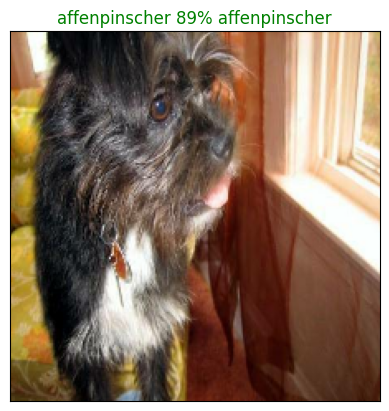

In [ ]:
pred_plot(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=55)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  #get the predicted label
  pred_label = get_pred_label(pred_prob)

  #find top 10 prediction indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  #find top 10 prediction values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  #find top 10 prediction label
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  #setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_indexes)),
                                            top_10_pred_values,
                                            color = "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
                                labels = top_10_pred_labels,
                                rotation = "vertical")
  #change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

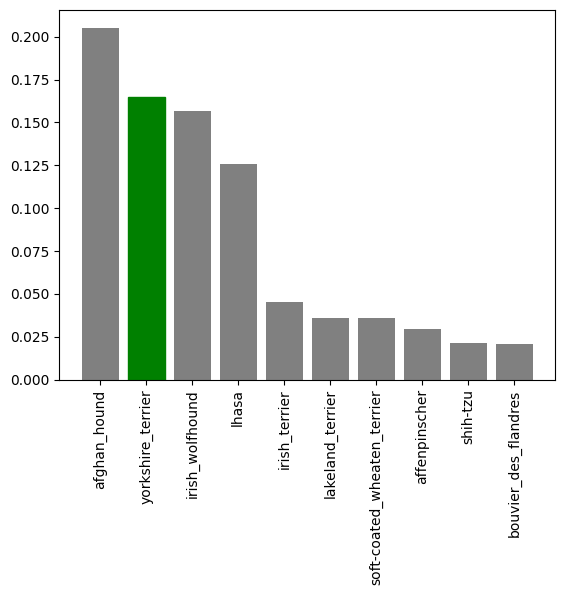

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
                      labels = val_labels,
                      n=10)

### Saving and reloading a trained model

In [ ]:
#create a fuction for saving a model
def saving_model(model, suffix= None):
  """
  save a given model in a models firectory and append suffix
  """
  #create a model dirctory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog vision/models", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" #save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
#create a fuction for loading a model
def loading_model(model_path):
  """
  load a saved model from spacific path
  """
  print(f"Loading saved model from : {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
saving_model(model, suffix='1000-images-mobiletv5-Adam')

Saving model to: drive/MyDrive/Dog vision/models/20230723-131200-1000-images-mobiletv5-Adam.h5...


'drive/MyDrive/Dog vision/models/20230723-131200-1000-images-mobiletv5-Adam.h5'

In [ ]:
loaded_1000_images_model = loading_model('drive/MyDrive/Dog vision/models/20230722-082627-1000-images-mobiletv5-Adam.h5')

Loading saved model from : drive/MyDrive/Dog vision/models/20230722-082627-1000-images-mobiletv5-Adam.h5


In [ ]:
#evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 14s 2s/step - loss: 1.4520 - Accuracy: 0.6500


[1.4519894123077393, 0.6499999761581421]

In [ ]:
#evaluate the loaded model
loaded_1000_images_model.evaluate(val_data)

7/7 [==============================] - 14s 2s/step - loss: 1.4479 - Accuracy: 0.6400


[1.4479095935821533, 0.6399999856948853]

### Training a big dog model on full data

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
#Create data batch with the full dataset
fd = create_data_batched(X, y)

Creating training data batches....


In [ ]:
fd

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5


In [ ]:
full_model_tensorboard = create_tensorboard_callback()
full_model_earlystopping = tf.keras.callbacks.EarlyStopping(monitor= "Accuracy", patience = 3)

In [ ]:
full_model.fit(x = fd, epochs=NUM_EPOCHS, callbacks = [full_model_tensorboard, full_model_earlystopping])

Epoch 1/100
320/320 [==============================] - 714s 2s/step - loss: 1.2912 - Accuracy: 0.6826
Epoch 2/100
320/320 [==============================] - 731s 2s/step - loss: 0.3587 - Accuracy: 0.8947
Epoch 3/100
320/320 [==============================] - 702s 2s/step - loss: 0.2028 - Accuracy: 0.9473
Epoch 4/100
320/320 [==============================] - 704s 2s/step - loss: 0.1309 - Accuracy: 0.9713


In [ ]:
#saving full model
saving_model(full_model, suffix= "all-images-Adam")

Saving model to: drive/MyDrive/Dog vision/models/20230723-140135-all-images-Adam.h5...


'drive/MyDrive/Dog vision/models/20230723-140135-all-images-Adam.h5'

In [ ]:
loaded_full_model = loading_model("drive/MyDrive/Dog vision/models/20230723-102022-all-images-Adam.h5")

Loading saved model from : drive/MyDrive/Dog vision/models/20230723-102022-all-images-Adam.h5


### Making predition on  the test dataset

In [ ]:
#load test image filename
test_path = "/content/drive/MyDrive/Dog vision/test/"
filename_test = [test_path + fname for fname in os.listdir(test_path)]

filename_test[:5]

['/content/drive/MyDrive/Dog vision/test/e5560686ee44dc59dbb99d6ef4ea54d8.jpg',
 '/content/drive/MyDrive/Dog vision/test/ddf2401701ee374c0f1f9dd607071ec7.jpg',
 '/content/drive/MyDrive/Dog vision/test/e63da7cff68f6a5e452bb73cdbd93ad3.jpg',
 '/content/drive/MyDrive/Dog vision/test/e5c9089a34d5352c765e8c453e106122.jpg',
 '/content/drive/MyDrive/Dog vision/test/de084b830010b6107215fef5d4a75b94.jpg']

In [ ]:
len(filename_test)

10357

In [ ]:
test_data = create_data_batched(filename_test, test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
test_predict = loaded_full_model.predict(test_data, verbose = 1)

324/324 [==============================] - 1152s 4s/step


In [ ]:
test_predict[:10]

array([[7.5772692e-07, 1.0180055e-08, 5.4036332e-07, ..., 2.2876835e-04,
        1.1527992e-06, 1.9103311e-07],
       [1.5955146e-03, 4.0012470e-05, 9.0138616e-07, ..., 9.2912349e-05,
        7.3051045e-04, 3.4558002e-03],
       [7.1458140e-05, 9.5700284e-07, 6.1537520e-07, ..., 1.7329222e-04,
        9.4272313e-05, 1.4498536e-05],
       ...,
       [4.0629337e-04, 1.9184308e-05, 6.3835580e-07, ..., 9.3441140e-06,
        2.7981491e-04, 1.8476925e-05],
       [1.3695468e-06, 9.7451823e-07, 2.1615394e-06, ..., 1.0296149e-05,
        1.4421805e-05, 1.8032972e-06],
       [2.5671136e-07, 5.9754950e-07, 8.7797742e-09, ..., 2.6559162e-06,
        2.6540451e-06, 2.4645604e-07]], dtype=float32)

### Predictions

In [ ]:
predict_df = pd.DataFrame(columns=['id']+list(unique_breed))
predict_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
test_path = "drive/MyDrive/Dog vision/test/"
predict_df['id'] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
predict_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e5560686ee44dc59dbb99d6ef4ea54d8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ddf2401701ee374c0f1f9dd607071ec7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e63da7cff68f6a5e452bb73cdbd93ad3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e5c9089a34d5352c765e8c453e106122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,de084b830010b6107215fef5d4a75b94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_predict.shape

(10357, 120)

In [ ]:
predict_df[list(unique_breed)] = test_predict
predict_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e5560686ee44dc59dbb99d6ef4ea54d8,7.577269e-07,1.018006e-08,5.403633e-07,1.743512e-07,4.762943e-04,0.000063,4.734983e-07,0.117477,3.357617e-06,...,1.496311e-05,2.304283e-04,0.000061,4.807934e-05,1.825983e-07,1.466185e-05,1.056086e-05,0.000229,0.000001,1.910331e-07
1,ddf2401701ee374c0f1f9dd607071ec7,1.595515e-03,4.001247e-05,9.013862e-07,1.312456e-05,7.168941e-05,0.000045,2.266724e-06,0.000007,1.108826e-07,...,6.983698e-05,7.858810e-06,0.000002,2.298145e-06,2.248798e-07,2.579189e-07,2.262069e-04,0.000093,0.000731,3.455800e-03
2,e63da7cff68f6a5e452bb73cdbd93ad3,7.145814e-05,9.570028e-07,6.153752e-07,4.636198e-06,3.196420e-06,0.000092,4.633953e-06,0.000062,1.176976e-06,...,4.179797e-06,1.814216e-05,0.000008,1.969711e-05,1.445801e-07,2.321019e-05,1.750186e-04,0.000173,0.000094,1.449854e-05
3,e5c9089a34d5352c765e8c453e106122,2.472058e-08,1.254239e-06,3.844324e-07,6.272633e-05,5.209812e-08,0.001319,3.668788e-04,0.000189,1.105009e-06,...,5.616436e-08,2.255418e-06,0.000001,9.299416e-06,3.123120e-07,4.978153e-07,3.951221e-07,0.000002,0.000002,6.098698e-05
4,de084b830010b6107215fef5d4a75b94,8.698205e-07,2.289885e-04,1.886844e-06,4.550804e-05,5.019791e-07,0.000003,3.226141e-07,0.000003,7.323257e-06,...,4.839575e-06,1.719737e-08,0.000098,9.043934e-07,5.700276e-04,6.414312e-08,1.319087e-06,0.000103,0.000036,5.529039e-08


In [ ]:
predict_df.to_csv("drive/MyDrive/Dog vision/full_submission_1_mobilienetV5_adam.csv", index=False)

### Making predictions on custom images

In [ ]:
custom_path = "drive/MyDrive/Dog vision/Dogs/"
costum_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_data = create_data_batched(costum_image_path, test_data = True)

Creating test data batches...


In [ ]:
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 794ms/step


In [ ]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range (len(custom_preds))]
custom_pred_labels

['appenzeller', 'pug', 'french_bulldog']

In [ ]:
custom_image = []

for image in custom_data.unbatch().as_numpy_iterator():
  custom_image.append(image)

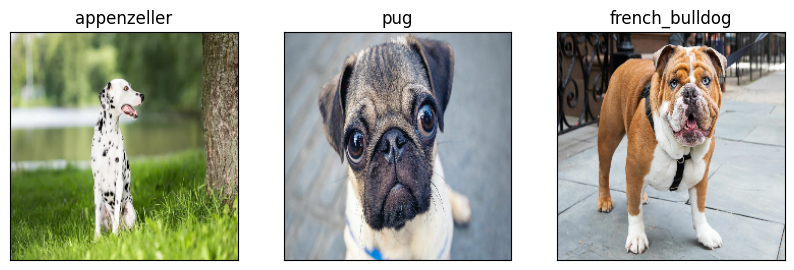

In [ ]:
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_image):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)